# Building a Breast Cancer Classifier in Pyhton 

## Hamed Abdi - Data Science Portfolio Projects 

### 1) Introduction
Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenge is how to classify tumors into malignant (cancerous) or benign (non cancerous). In this portfolio project, I use Python and machine learning best practices to build a breast cancer classifier. I have downloaded the dataset from Kaggle. 

### 2) Understanding the Dataset

Let's import the necessary libraries and dive into the dataset:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv('breast-cancer.csv')

The first 5 rows of the dataset are as following:

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
print("The dataset has " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns.")

The dataset has 569 rows and 32 columns.


Each row corresponds to one cell and each column corresponds to a geometrical feature of that cell. 

In [6]:
print("The column names are as following: ")
df.columns

The column names are as following: 


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The target variable is "diagnosis". It is either "B" (i.e. benign) or "M" (i.e. malignant). The feature variables are from the type "float". 

Let's drop "id" because it is not useful. 

In [8]:
df.drop('id', axis=1, inplace=True)

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


It seems some features have zero values (see the "min" row). Let's deal with that later if we end up using those features for creating the model. 

In [10]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There is no "none" values in the dataset.  

### 3) Exploratory Data Analysis

Let's take a look at how each variable splits the distribution of the labels:

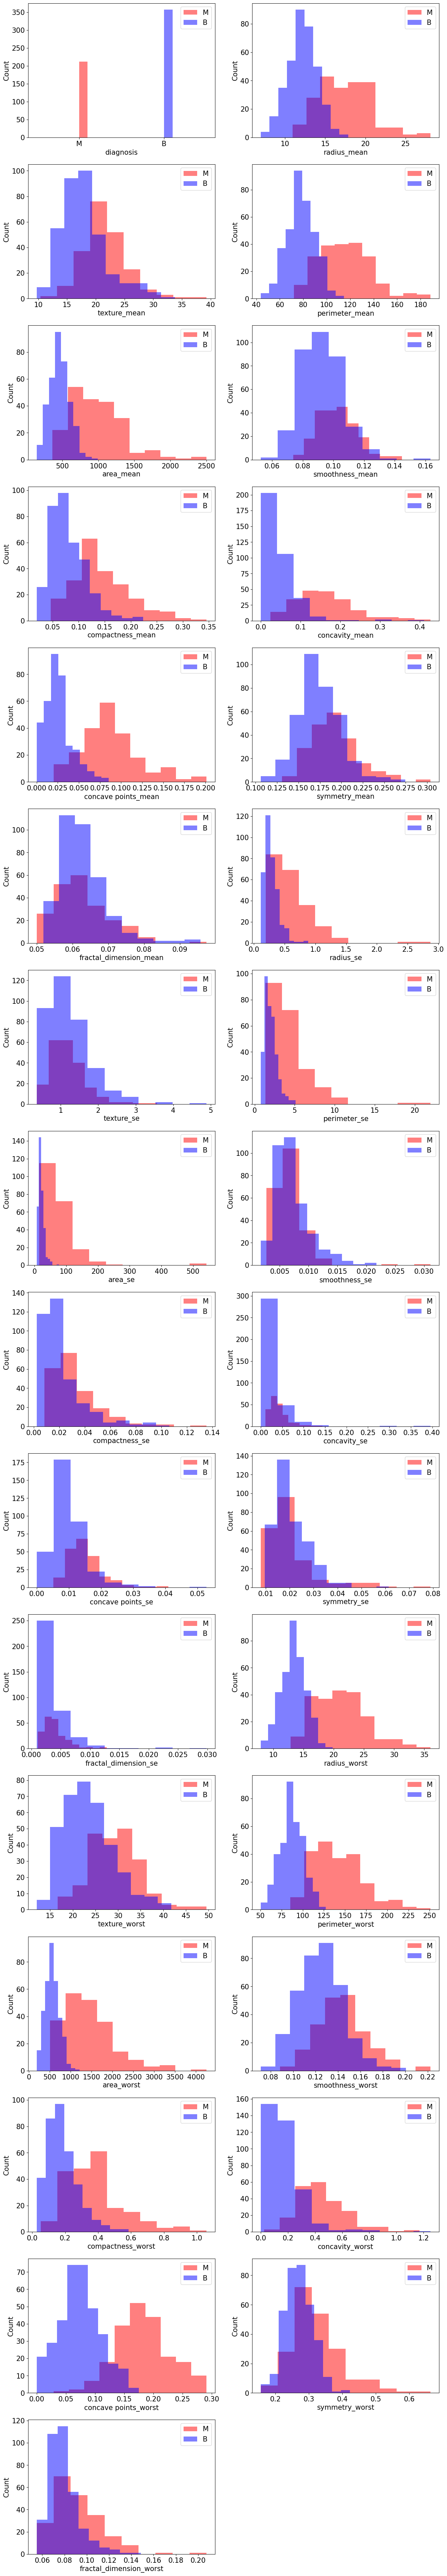

In [11]:
fig = plt.figure(figsize=(16,100))
n_bins = 10
n_rows = int(np.ceil(len(df.columns)/2))

for idx, col in enumerate(df.columns):
    plt.subplot(n_rows, 2, idx+1)
    plt.hist(df[col][df['diagnosis'] == 'M'], bins=n_bins, color = 'r', alpha = 0.5, label = 'M')
    plt.hist(df[col][df['diagnosis'] == 'B'], bins=n_bins, color = 'b', alpha = 0.5, label = 'B')
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=15)

There is a slight class imbalance in the dataset: 63% of the cells are benign and the remaining 37% are malignant. 

In [12]:
print("The percentage of benign cells is:")
print(len(df[df['diagnosis'] == 'B'])/len(df) * 100)
print("The percentage of malignant cells is:")
print(len(df[df['diagnosis'] == 'M'])/len(df) * 100)

The percentage of benign cells is:
62.741652021089635
The percentage of malignant cells is:
37.258347978910365


Some features such as "radius_mean" split the labels nicely. I bet radius_mean ends up being an important feature for distinguishing malignant cells from the benign ones. On the other hand, some features such as fractal_dimension_se don't provide with a great split. I doubt if fractal_dimension_se ends up as an important feature. 

Also, I suspect some features are correlated. For example, it seems if we have radius_mean, then perimeter_mean and area_mean are not going to add any new information. Let's check the degree of linear correlation between the features: 

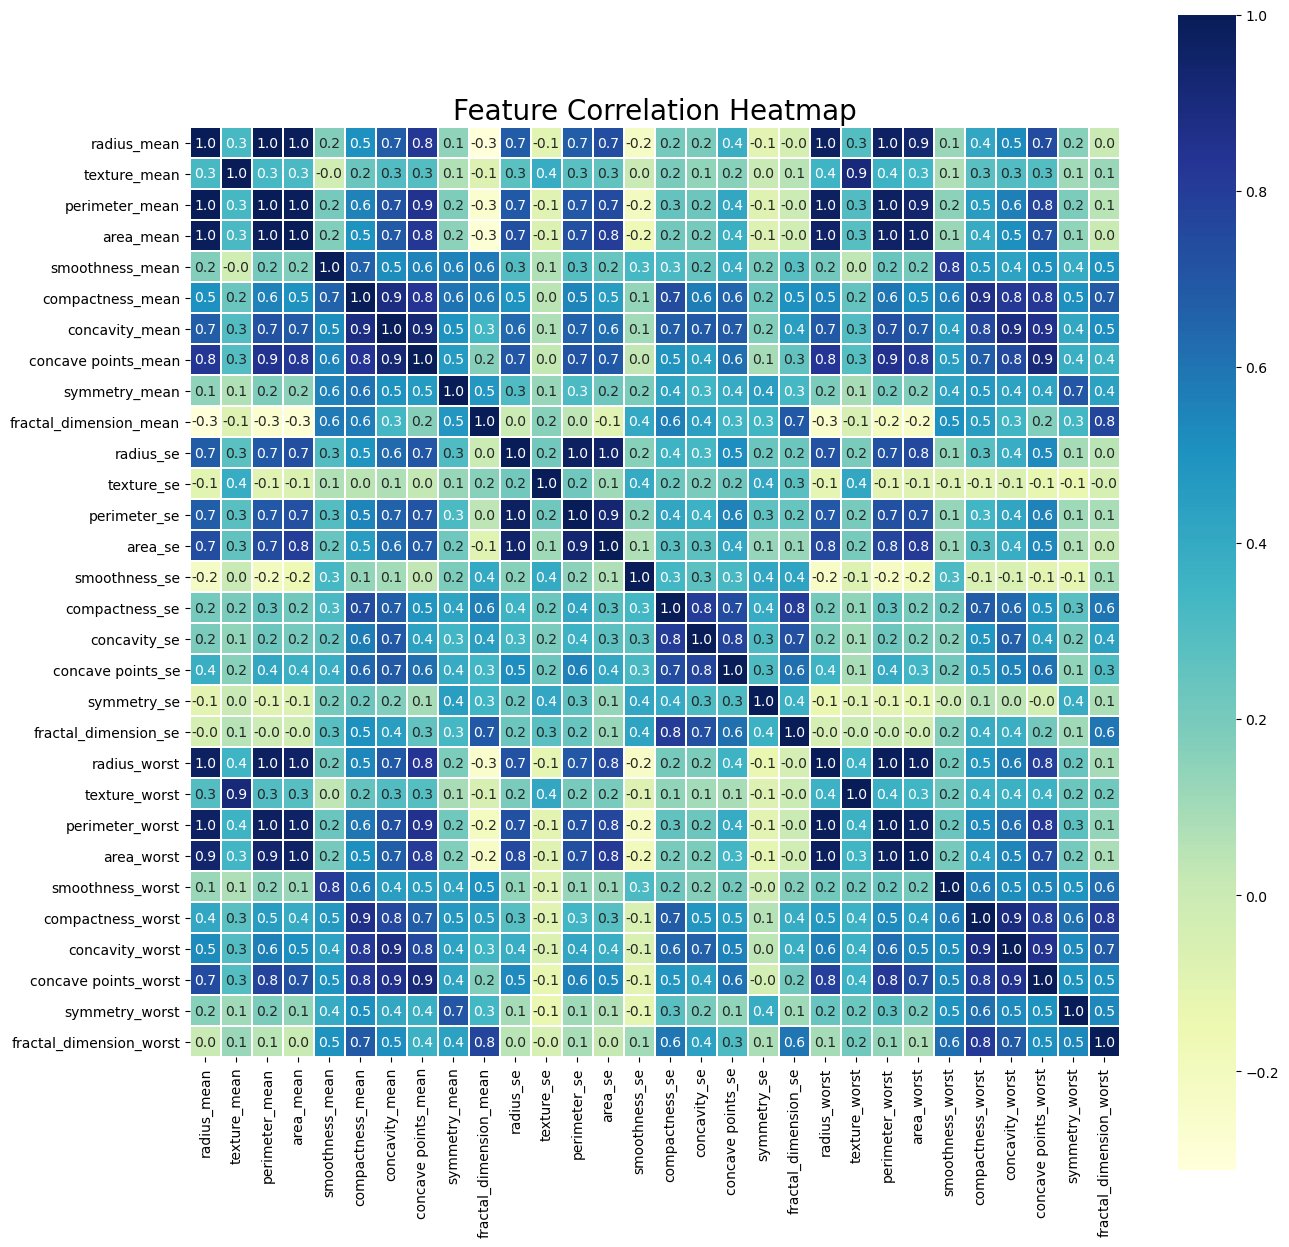

In [13]:
# create correlation heatmap
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax, cmap="YlGnBu", square=True)
plt.title("Feature Correlation Heatmap", fontsize = 20)
plt.show()

### 4) Data Pre-processing

#### 4.1) Removing Redundant (Highly Correlated) Features

As we can see from the heatmap, some features are highly linearly correlated. Here, from each group of highly correlated features (correlation coefficient higher than 0.7), I only keep one and remove the rest as no new information is added by those extra features:

In [14]:
# remove highly correlated features 
high_correlation_threshold = 0.7
corr_df = df.corr()
deleted_cols = []
for col in corr_df.columns:
    if col not in deleted_cols:
        deleted_cols += list(corr_df[col][corr_df[col] >= high_correlation_threshold].index)
        deleted_cols.remove(col)    

In [15]:
less_correlated_features = [feature for feature in corr_df.columns if feature not in deleted_cols]
print("The less correlated features are as follows: ")
print(less_correlated_features)
print("The number of less correlated features is: ")
print(len(less_correlated_features))

The less correlated features are as follows: 
['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'concavity_se', 'symmetry_se', 'symmetry_worst']
The number of less correlated features is: 
12


In [16]:
less_correlated_df = df[less_correlated_features + ['diagnosis']]

After removing the highly correlated features, the first 5 rows of the dataset are as following:

In [17]:
less_correlated_df.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concavity_se,symmetry_se,symmetry_worst,diagnosis
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.05373,0.03003,0.4601,M
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01860,0.01389,0.2750,M
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.03832,0.02250,0.3613,M
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.05661,0.05963,0.6638,M
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.05688,0.01756,0.2364,M


#### 4.2) Imputing Missing Values

Let's see if any of the 12 remaining features has zero values. 

In [18]:
less_correlated_df.describe()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concavity_se,symmetry_se,symmetry_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.096360,0.104341,0.181162,0.062798,0.405172,1.216853,0.007041,0.031894,0.020542,0.290076
std,3.524049,4.301036,0.014064,0.052813,0.027414,0.007060,0.277313,0.551648,0.003003,0.030186,0.008266,0.061867
min,6.981000,9.710000,0.052630,0.019380,0.106000,0.049960,0.111500,0.360200,0.001713,0.000000,0.007882,0.156500
25%,11.700000,16.170000,0.086370,0.064920,0.161900,0.057700,0.232400,0.833900,0.005169,0.015090,0.015160,0.250400
50%,13.370000,18.840000,0.095870,0.092630,0.179200,0.061540,0.324200,1.108000,0.006380,0.025890,0.018730,0.282200
75%,15.780000,21.800000,0.105300,0.130400,0.195700,0.066120,0.478900,1.474000,0.008146,0.042050,0.023480,0.317900
max,28.110000,39.280000,0.163400,0.345400,0.304000,0.097440,2.873000,4.885000,0.031130,0.396000,0.078950,0.663800


It seems the only feature with some zero values is "concavity_se". Let's take a closer look at that feature:

In [19]:
print("The number of datapoints with a zero value for concavity_se is:")
print(len(less_correlated_df['concavity_se'][less_correlated_df['concavity_se'] == 0.0]))

The number of datapoints with a zero value for concavity_se is:
13


I replace these 13 zero values with the mean of the non-zero concavity_se values:

In [20]:
# calculate the mean of non-zero "concavity_se" values 
non_zero_concavity_se_mean = \
np.mean(less_correlated_df['concavity_se'][less_correlated_df['concavity_se'] > 0.0].values)
print("The mean of non-zero concavity_se values is:")
print(non_zero_concavity_se_mean)

The mean of non-zero concavity_se values is:
0.032639432733812944


In [21]:
# replace zero "concavity_se" values by non_zero_concavity_se_mean
pd.options.mode.chained_assignment = None
less_correlated_df['concavity_se'] = \
                less_correlated_df['concavity_se'].apply(lambda x: non_zero_concavity_se_mean if x==0 else x)

In [22]:
less_correlated_df.describe()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concavity_se,symmetry_se,symmetry_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.096360,0.104341,0.181162,0.062798,0.405172,1.216853,0.007041,0.032639,0.020542,0.290076
std,3.524049,4.301036,0.014064,0.052813,0.027414,0.007060,0.277313,0.551648,0.003003,0.029789,0.008266,0.061867
min,6.981000,9.710000,0.052630,0.019380,0.106000,0.049960,0.111500,0.360200,0.001713,0.000692,0.007882,0.156500
25%,11.700000,16.170000,0.086370,0.064920,0.161900,0.057700,0.232400,0.833900,0.005169,0.015960,0.015160,0.250400
50%,13.370000,18.840000,0.095870,0.092630,0.179200,0.061540,0.324200,1.108000,0.006380,0.026640,0.018730,0.282200
75%,15.780000,21.800000,0.105300,0.130400,0.195700,0.066120,0.478900,1.474000,0.008146,0.042050,0.023480,0.317900
max,28.110000,39.280000,0.163400,0.345400,0.304000,0.097440,2.873000,4.885000,0.031130,0.396000,0.078950,0.663800


The missing values are imputed (all the column min values are greater than zero). 

#### 4.3) Data Scaling

Now that I have removed the redundant features, it is time to scale the feature variables. 

In [23]:
# scale the feature variables 
X = less_correlated_df[less_correlated_features]
X_standard = preprocessing.scale(X)

# turn the target variable from "B/M" to "0/1" 
y = less_correlated_df['diagnosis']
y = y.apply(lambda x: 1 if x == 'M' else 0)
y = y.values

#### 4.4) Creating the training, validation and test sets

Here is how split the dataset: 60% training set, 20% validation set and 20% test set. 

In [24]:
X_, X_test, y_, y_test = train_test_split(X_standard, y, test_size=0.20, random_state=1)
X_train, X_validation, y_train, y_validation = train_test_split(X_, y_, test_size=0.25, random_state=50)

### 5) ANOVA Feature Selection

Since we have numeric features and categorical target, we can use ANOVA test to rank the features based on their importance. The most important feature is the one with the highest F-statistic. The feature that has the highest F-statistic explains the variation between the two groups better than any other feature.  

In [25]:
# ANOVA feature selection for numeric input and categorical output

# define feature selection
fs = SelectKBest(score_func=f_classif, k=len(less_correlated_features))

# apply feature selection
selected_df = fs.fit_transform(less_correlated_df[less_correlated_features].values, 
                               less_correlated_df['diagnosis'].values)

# rank the features based on their F-statistic 
mask = fs.get_support() #list of booleans
all_features_in_order = [] # The list of the k best features
for bool, feature in zip(mask, less_correlated_df.columns):
    if bool:
        all_features_in_order.append(feature)

In [26]:
print("The most important features based on the ANOVA test are as following: ")
for feature in all_features_in_order:
    print(feature)

The most important features based on the ANOVA test are as following: 
radius_mean
texture_mean
smoothness_mean
compactness_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
smoothness_se
concavity_se
symmetry_se
symmetry_worst


"radius_mean" turns out to be the most important feature giving the best split of labels. In what follows, I use the above ranking of features for building models with the optimal set of features.

### 6) Logistic Regression

The dataset is ready for modeling. Let's start with logistic regression which is the most basic choice for a binary classification problem. 

Now, my goal is finding the most optimal set of features. I start by building a model with only "radius_mean" feature (i.e. the most important feature). Since the dataset is only slightly imbalanced, accuracy is still a good measure for model performance. I compute accuracy on training and validation sets. Then, I add "texture_mean" feature (i.e. second most important feature) to the model. I compute accuracy again. I'll continue the same procedure until I have included all the 12 features. 

In [27]:
def find_optimal_features(all_features_in_order, X_train, y_train, X_validation, y_validation, model_type, \
                          metric = None):
    number_features = []
    training_accuracy_list = []
    validation_accuracy_list = []

    # start with a the top feature only then add features one by one based on their ranking 
    for idx, feature in enumerate(all_features_in_order):
        classifier = model_type
        if metric is None:
            model = classifier.fit(X_train[:, : idx + 1], y_train)
        else:
            model = classifier.fit(X_train[:, : idx + 1], y_train, eval_metric = metric)
        y_train_pred = model.predict(X_train[:, : idx + 1])
        y_validation_pred = model.predict(X_validation[:, : idx + 1])

        number_features.append(idx + 1)
        training_accuracy_list.append(accuracy_score(y_train_pred, y_train)) 
        validation_accuracy_list.append(accuracy_score(y_validation_pred, y_validation))
        
    return number_features, training_accuracy_list, validation_accuracy_list

In [28]:
# feature selection with logistic regression 
number_features, training_accuracy_list, validation_accuracy_list = \
find_optimal_features(all_features_in_order, X_train, y_train, X_validation, y_validation, LogisticRegression())

In order to evaluate the performance of each model, we need a baseline model. If we label each cell as "benign", we are going to be correct around 63% of times. We can use that as baseline accuracy and see if we can beat that:

In [29]:
# compute baseline accuracy: all cells are benign 
baseline_accuracy = len(less_correlated_df[less_correlated_df['diagnosis'] == 'B']) / len(less_correlated_df)

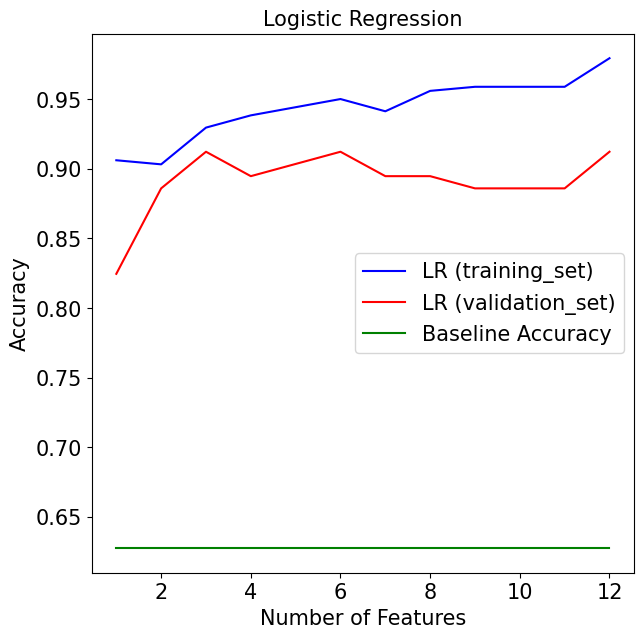

In [30]:
fig = plt.figure(figsize=(7,7))
plt.plot(number_features, training_accuracy_list, color = 'b', label = 'LR (training_set)')
plt.plot(number_features, validation_accuracy_list, color = 'r', label = 'LR (validation_set)')
plt.plot([1, len(all_features_in_order)], [baseline_accuracy, baseline_accuracy], color = 'g', \
         label = 'Baseline Accuracy')
plt.xlabel('Number of Features', fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('Logistic Regression', fontsize=15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

It seems adding more than 3 features would result in a higher training accuracy while the validation accuracy does not change much. This means using more than three features would result in overfitting the training set. Therefore, the best logistic regression model is the one with the top 3 features. This model is the most generalizable and significantly outperforms the baseline accuracy (~ 91.3% validation accuracy vs. 62.7% baseline accuracy). The top three features are:

- radius_mean 
- texture_mean
- smoothness_mean

### 7) Random Forest

Let's try the random forest algorithm:

In [31]:
# Feature selection with Random Forest 
number_features, training_accuracy_list, validation_accuracy_list = \
find_optimal_features(all_features_in_order, X_train, y_train, X_validation, y_validation, RandomForestClassifier())

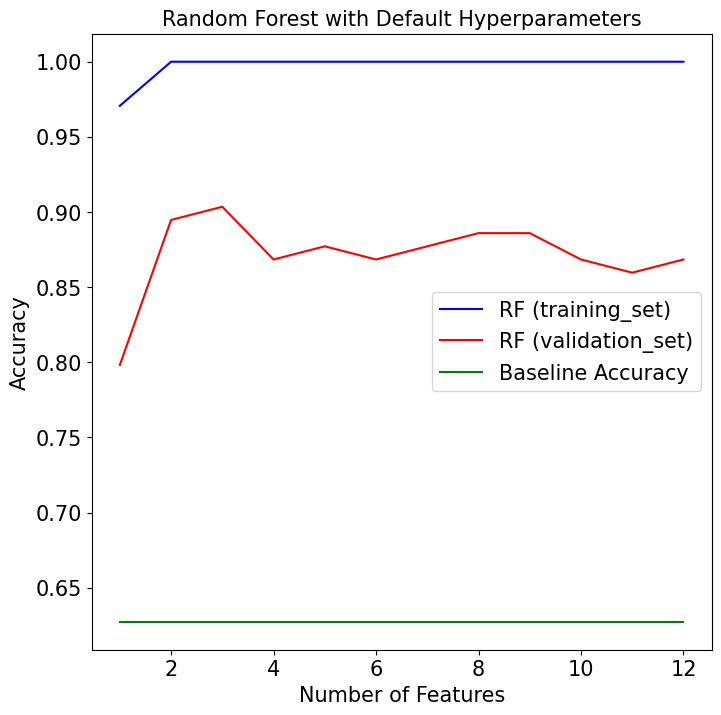

In [32]:
fig = plt.figure(figsize=(8,8))
plt.plot(number_features, training_accuracy_list, color = 'b', label = 'RF (training_set)')
plt.plot(number_features, validation_accuracy_list, color = 'r', label = 'RF (validation_set)')
plt.plot([1, len(all_features_in_order)], [baseline_accuracy, baseline_accuracy], color = 'g', \
         label = 'Baseline Accuracy')
plt.xlabel('Number of Features', fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('Random Forest with Default Hyperparameters', fontsize=15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

Similar to logistic regression, the model with the top 3 features generates the highest validation accuracy. However, the training accuracy is very high (100% for models with two features and more). This is a sign of overfitting. Since the best model has only 3 features, tuning the max_features hyperparameter does not seem like a great idea. However, lowering "max_depth" might result in decreasing overfitting.  

In [33]:
def tune_max_depth_RF(number_important_feature, min_depth, max_depth):
    training_accuracy_list = []
    validation_accuracy_list = []

    for depth in range(min_depth, max_depth):
        RF = RandomForestClassifier(max_depth = depth)
        model = RF.fit(X_train[:, : number_important_feature], y_train)
        y_train_pred = model.predict(X_train[:, : number_important_feature])
        y_validation_pred = model.predict(X_validation[:, : number_important_feature])

        training_accuracy_list.append(accuracy_score(y_train_pred, y_train)) 
        validation_accuracy_list.append(accuracy_score(y_validation_pred, y_validation))
        
    return training_accuracy_list, validation_accuracy_list

In [38]:
# tuning max_depth
training_accuracy_list, validation_accuracy_list = \
tune_max_depth_RF(3, 2, 10)

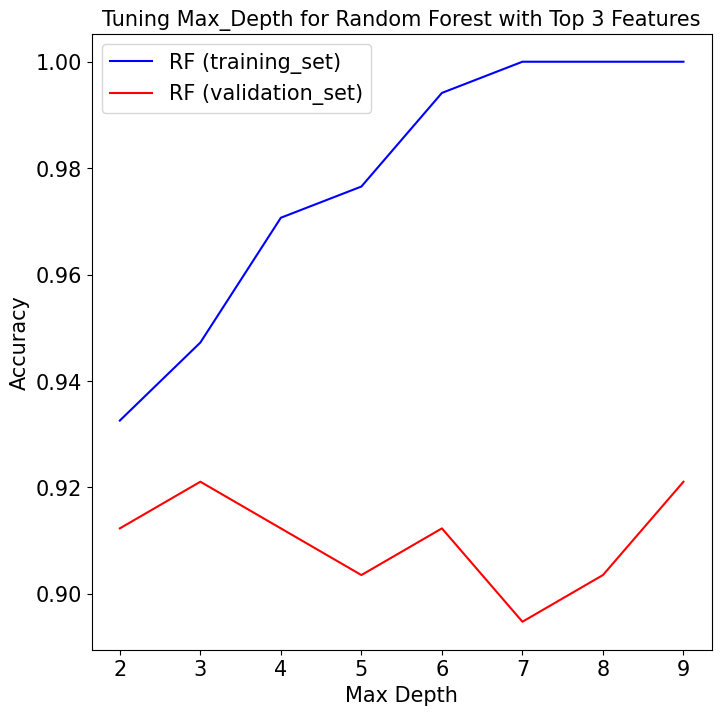

In [39]:
fig = plt.figure(figsize=(8,8))
plt.plot(range(2, 10), training_accuracy_list, color = 'b', label = 'RF (training_set)')
plt.plot(range(2, 10), validation_accuracy_list, color = 'r', label = 'RF (validation_set)')
plt.xlabel('Max Depth', fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('Tuning Max_Depth for Random Forest with Top 3 Features', fontsize=15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

It seems max_depth=3 generates the highest validation accuracy and a less overfit model. Now, let's re-do the feature selection step with max_depth=3. 

In [42]:
# Feature selection for Random Forest with max_depth=3 
number_features, training_accuracy_list, validation_accuracy_list = \
find_optimal_features(all_features_in_order, X_train, y_train, X_validation, y_validation,\
                      RandomForestClassifier(max_depth = 3))

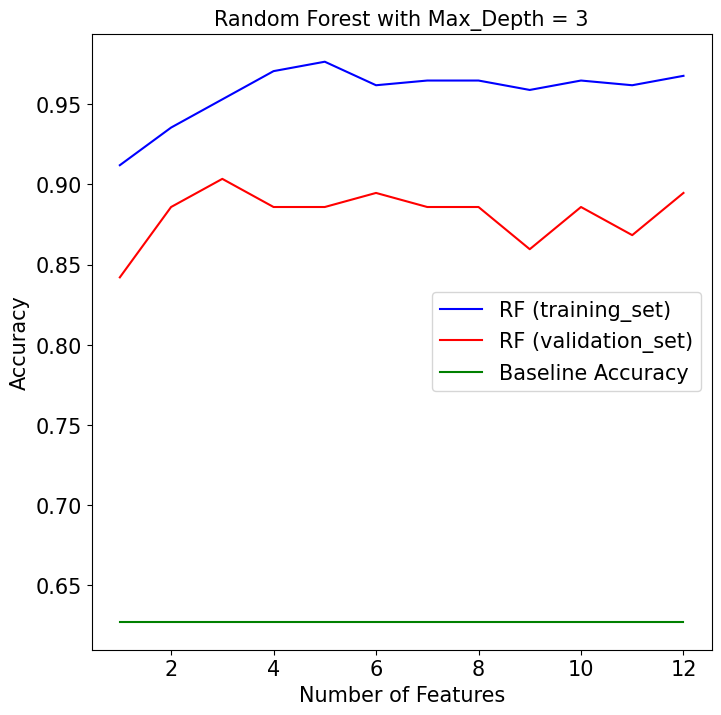

In [43]:
fig = plt.figure(figsize=(8,8))
plt.plot(number_features, training_accuracy_list, color = 'b', label = 'RF (training_set)')
plt.plot(number_features, validation_accuracy_list, color = 'r', label = 'RF (validation_set)')
plt.plot([1, len(all_features_in_order)], [baseline_accuracy, baseline_accuracy], color = 'g', \
         label = 'Baseline Accuracy')
plt.xlabel('Number of Features', fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('Random Forest with Max_Depth = 3', fontsize=15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

We can see that we have reduced overfitting. The best random forest model is the one with the top 3 features and max_depth=3. The validation accuracy for this model is 90.4%. 

### 8) XGBoost

Finally, let's try the XGBoost algorithm:

In [46]:
# Feature selection with XGBoost 
number_features, training_accuracy_list, validation_accuracy_list = \
find_optimal_features(all_features_in_order, X_train, y_train, X_validation, y_validation, xgb.XGBClassifier(), \
                      metric='rmse')

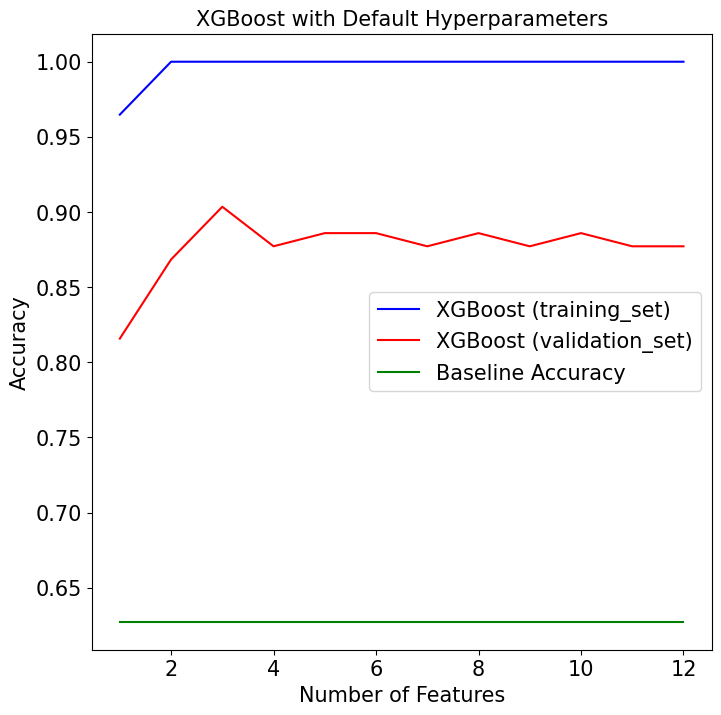

In [47]:
fig = plt.figure(figsize=(8,8))
plt.plot(number_features, training_accuracy_list, color = 'b', label = 'XGBoost (training_set)')
plt.plot(number_features, validation_accuracy_list, color = 'r', label = 'XGBoost (validation_set)')
plt.plot([1, len(all_features_in_order)], [baseline_accuracy, baseline_accuracy], color = 'g', label = 'Baseline Accuracy')
plt.xlabel('Number of Features', fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('XGBoost with Default Hyperparameters', fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

Similar to logistic regression and random forest, the model with the top 3 features generates the highest validation accuracy. However, similar to random forest, the training accuracy is very high (100% for models with two features and more). This is a sign of overfitting. Let's see if we can increase the generalizability of the model by tuning the max_depth hyperparameter (similar to random forest).   

In [48]:
def tune_max_depth_xgboost(number_important_feature, min_depth, max_depth):
    training_accuracy_list = []
    validation_accuracy_list = []

    for depth in range(min_depth, max_depth):
        xgboost = xgb.XGBClassifier(max_depth = depth)
        model = xgboost.fit(X_train[:, : number_important_feature], y_train, eval_metric='rmse')
        y_train_pred = model.predict(X_train[:, : number_important_feature])
        y_validation_pred = model.predict(X_validation[:, : number_important_feature])

        training_accuracy_list.append(accuracy_score(y_train_pred, y_train)) 
        validation_accuracy_list.append(accuracy_score(y_validation_pred, y_validation))
        
    return training_accuracy_list, validation_accuracy_list

In [49]:
training_accuracy_list, validation_accuracy_list = \
tune_max_depth_xgboost(3, 1, 10)

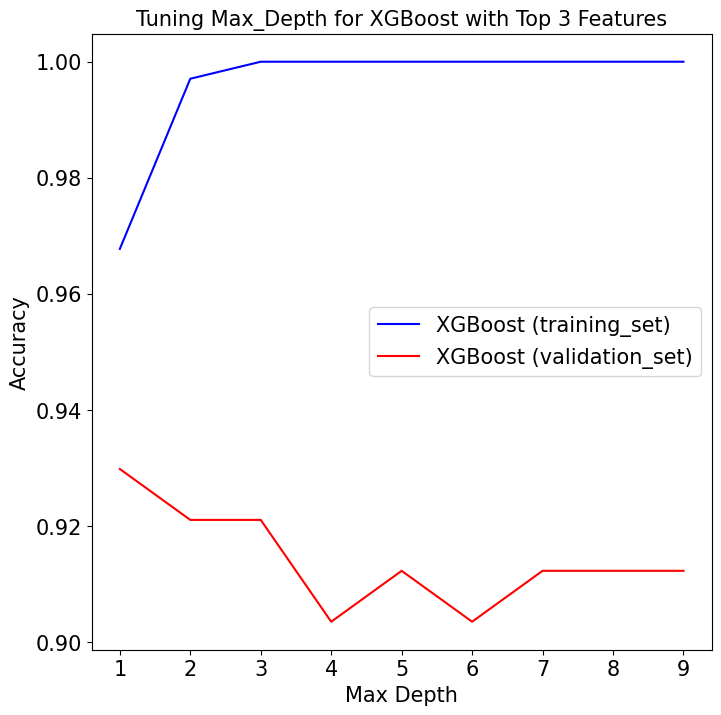

In [50]:
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, 10), training_accuracy_list, color = 'b', label = 'XGBoost (training_set)')
plt.plot(range(1, 10), validation_accuracy_list, color = 'r', label = 'XGBoost (validation_set)')
plt.xlabel('Max Depth', fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('Tuning Max_Depth for XGBoost with Top 3 Features', fontsize=15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

It seems max_depth=1 generates the simplest and most generilizable model. Now, let's re-do the feature selection step with max_depth=1. 

In [51]:
# Feature selection with XGBoost 
number_features, training_accuracy_list, validation_accuracy_list = \
find_optimal_features(all_features_in_order, X_train, y_train, X_validation, y_validation, \
                      xgb.XGBClassifier(max_depth = 1), metric='rmse')

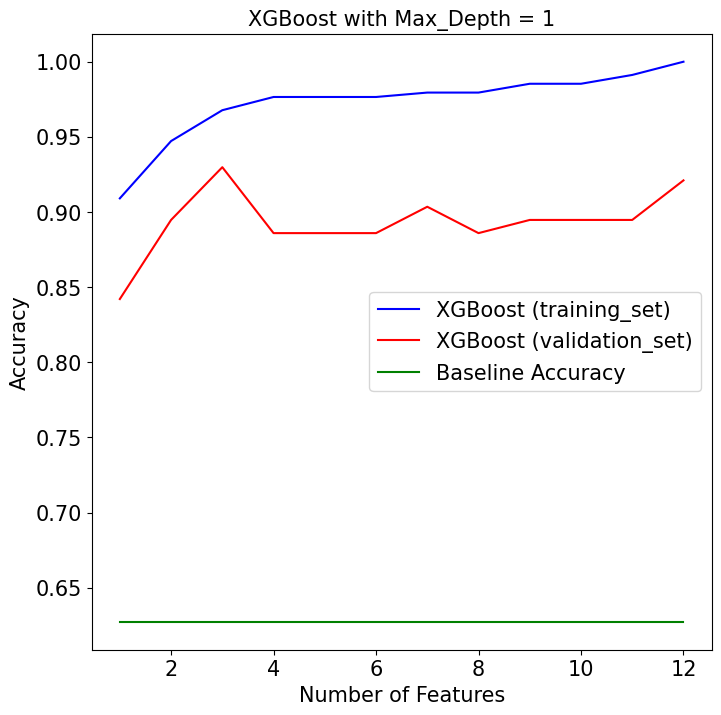

In [52]:
fig = plt.figure(figsize=(8,8))
plt.plot(number_features, training_accuracy_list, color = 'b', label = 'XGBoost (training_set)')
plt.plot(number_features, validation_accuracy_list, color = 'r', label = 'XGBoost (validation_set)')
plt.plot([1, len(all_features_in_order)], [baseline_accuracy, baseline_accuracy], color = 'g', \
         label = 'Baseline Accuracy')
plt.xlabel('Number of Features', fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('XGBoost with Max_Depth = 1', fontsize=15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

It seems XGboost with the top 3 features and max_depth = 1 generates the simplest and most generalizable model with validation accuracy of 93%.  

### 9) The Best Model and its Performance on Unseen Data (Test Set Accuracy)

It turns out that our best model is XGBoost with max_depth = 1 and the following 3 features only:

- radius_mean 
- texture_mean
- smoothness_mean

In [54]:
# evaluate performance on unseen data (test set)
number_important_feature = 3
xgboost = xgb.XGBClassifier(max_depth = 1)
model = xgboost.fit(X_train[:, : number_important_feature], y_train, eval_metric='rmse')
#y_train_pred = model.predict(X_train[:, : number_important_feature])
y_test_pred = model.predict(X_test[:, : number_important_feature])

print('The accuracy of the model on unseen data (test set) is:')
print(accuracy_score(y_test_pred, y_test))

The accuracy of the model on unseen data (test set) is:
0.9298245614035088


The accuracy on the test set is approximately 93% which significantly outperforms the baseline accuracy and shows that our model generalizes well to unseen data.  

### 10) Visualizing the Label Distribution Based on the Top Three Features

We started with 30 features, however, our best model has only 3 features! It is nice to visualize how these 3 features split the labels:

In [55]:
selected_features = all_features_in_order[: 3]
print(selected_features)

['radius_mean', 'texture_mean', 'smoothness_mean']


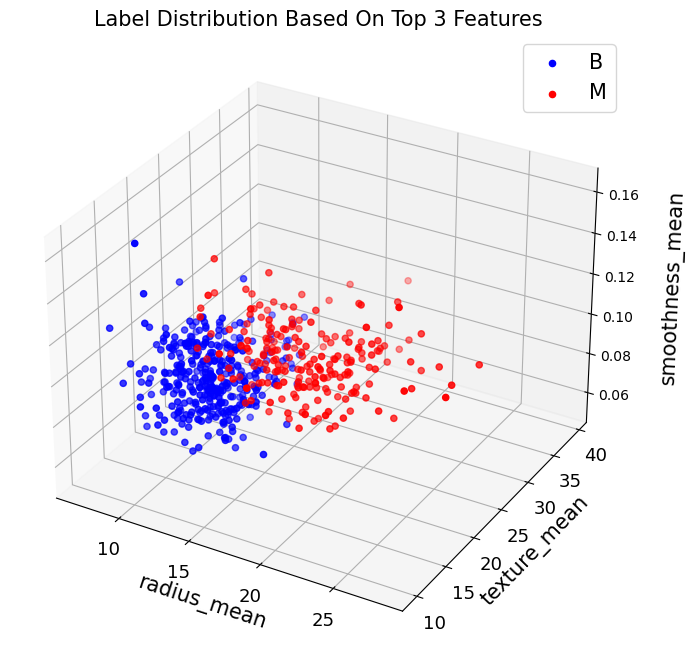

In [56]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.scatter(less_correlated_df[selected_features[0]][less_correlated_df['diagnosis'] == 'B'],
          less_correlated_df[selected_features[1]][less_correlated_df['diagnosis'] == 'B'],
          less_correlated_df[selected_features[2]][less_correlated_df['diagnosis'] == 'B'],
           color = 'b', label = 'B')

ax.scatter(less_correlated_df[selected_features[0]][less_correlated_df['diagnosis'] == 'M'],
           less_correlated_df[selected_features[1]][less_correlated_df['diagnosis'] == 'M'],
           less_correlated_df[selected_features[2]][less_correlated_df['diagnosis'] == 'M'],
           color = 'r', label = 'M')
                                          
ax.set_title('Label Distribution Based On Top 3 Features', fontsize=15)

# Set axes label
ax.set_xlabel(selected_features[0], fontsize=15)
plt.xticks(fontsize=13)
ax.set_ylabel(selected_features[1], fontsize=15)
plt.yticks(fontsize=13)
ax.set_zlabel(selected_features[2], fontsize=15, labelpad=15)
plt.legend(fontsize=15)

plt.show()

### 11) Summary

1) Our goal in this portfolio project is building a breast cancer classifier.

2) We downloaded a breast cancer dataset from Kaggle. The dataset has 30 numerical feature variables that describe the geometry of each cell. The target variable is categorical with two values: benign (healthy) and malignant (cancerous). Our goal is to build a model that accurately distiguishes the malignant cells from the benign ones. 

3) We detected and removed redundant features (i.e. highly correlated features). We reduced the number of features to 12.

4) We used ANOVA feature selection to rank the features based on how well they split the labels. 

5) We tried three types of classification models: Logistic regression, random forest and XGBoost. The best model turned out to be XGBoost with only the top three features and max_depth=1. Our simple model significantly outperforms the baseline accuracy (93% validation and test accuracy vs. 63% baseline accuracy). 

6) We reduced the number of features from 30 to 3. The only three features that end up being important are the following (look at the last visualization):
- radius_mean (or any other highly correlated feature to radius_mean such as area_mean)
- texture_mean (or any other highly correlated feature to texture_mean such as texture_worst)
- smoothness_mean (or any other highly correlated feature to smoothness_mean such as smoothness_worst)